# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# set this so the graphs open internally
%matplotlib inline
sns.set()

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [38]:
chipo = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(chipo,sep='\t')

### Step 4. See the first 10 entries

In [39]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items bought

In [40]:
x = df.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False).to_frame()
x.head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [41]:
items = x.index[:5]
items

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink'],
      dtype='object', name='item_name')

In [42]:
values = x.values[:5].flatten()
values

array([761, 591, 506, 386, 351], dtype=int64)

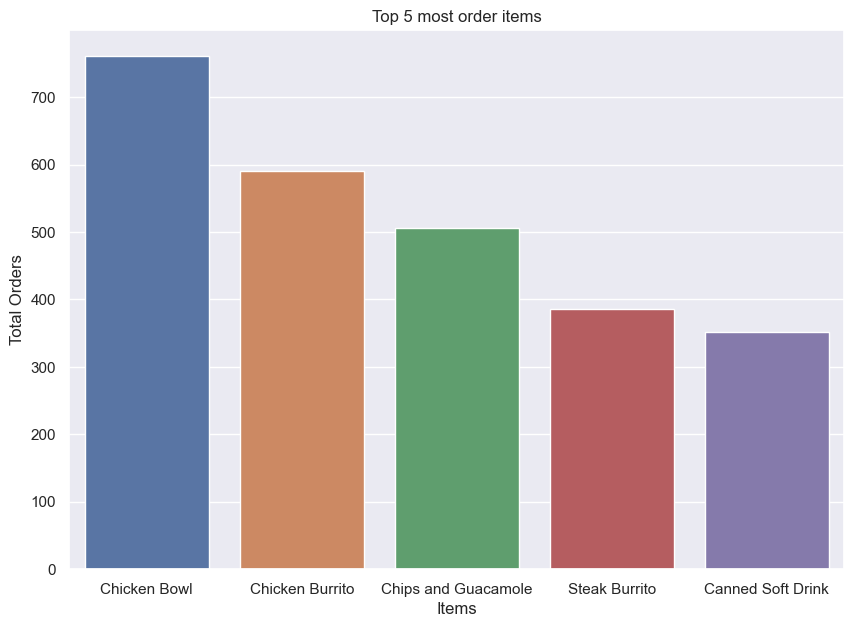

In [43]:
plt.figure(figsize=(10,7))
sns.barplot(x=items,y=values)
plt.title('Top 5 most order items')
plt.xlabel('Items')
plt.ylabel('Total Orders')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [44]:
df['item_price'] = df['item_price'].str.replace('$','').apply(lambda x: x).astype(float)

C:\Users\mtayy\AppData\Local\Temp\ipykernel_35232\3692228734.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$','').apply(lambda x: x).astype(float)


In [47]:
orders = df.groupby(['order_id']).sum()
orders

C:\Users\mtayy\AppData\Local\Temp\ipykernel_35232\2427011913.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = df.groupby(['order_id']).sum()


,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


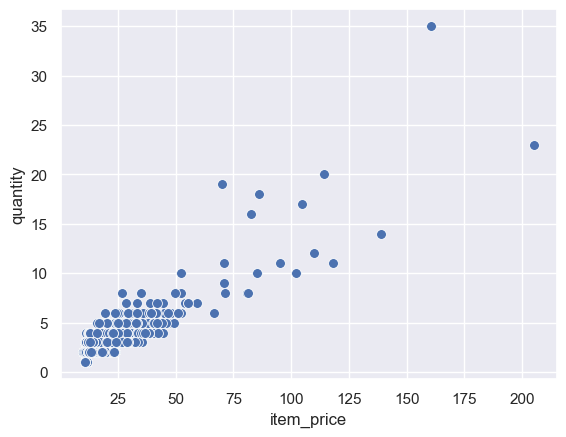

In [52]:
sns.scatterplot(x='item_price',y='quantity',data=orders,s = 50)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

### What are top 5 most expensive Items. Draw the barplot accornding to there prices

In [55]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [58]:
expensive_items = df.groupby('item_name')['item_price'].max().sort_values(ascending=False)
expensive_items

item_name
Chips and Fresh Tomato Salsa             44.25
Carnitas Bowl                            35.25
Chicken Burrito                          35.00
Veggie Burrito                           33.75
Chicken Bowl                             32.94
Steak Burrito                            27.75
Steak Bowl                               26.07
Steak Salad Bowl                         23.78
Chicken Salad Bowl                       22.50
Bowl                                     22.20
Chicken Soft Tacos                       21.96
Steak Soft Tacos                         18.50
Carnitas Burrito                         18.50
Barbacoa Crispy Tacos                    18.50
Steak Crispy Tacos                       17.98
Carnitas Crispy Tacos                    17.98
Chips and Guacamole                      17.80
Chicken Crispy Tacos                     17.50
Veggie Bowl                              16.98
Veggie Soft Tacos                        16.98
Bottled Water                            15.00
Sid

In [59]:
items = expensive_items.index[:5]
values = expensive_items.values[:5]
print(items)
print(values)

Index(['Chips and Fresh Tomato Salsa', 'Carnitas Bowl', 'Chicken Burrito',
       'Veggie Burrito', 'Chicken Bowl'],
      dtype='object', name='item_name')
[44.25 35.25 35.   33.75 32.94]


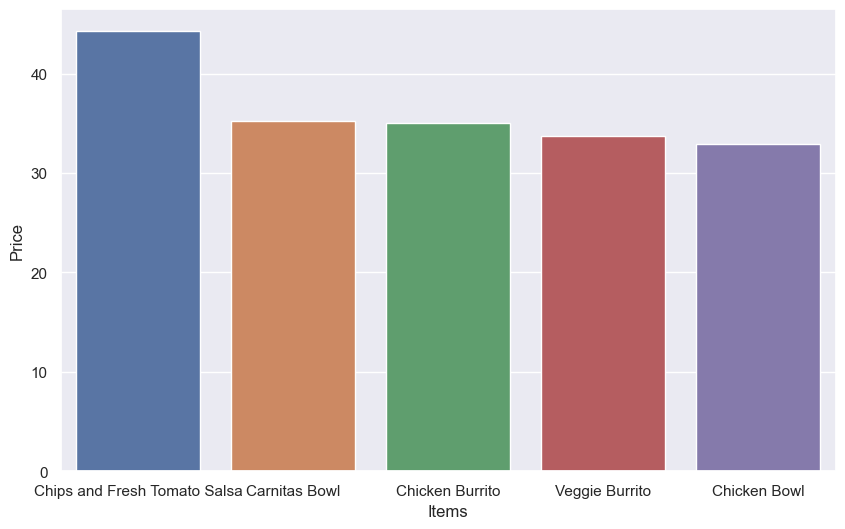

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x=items,y=values)
plt.xlabel('Items')
plt.ylabel('Price')
plt.show()